In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_excel(r"Rel2.xlsx")

In [5]:
df.head(5)

df2 = df[['Date','Positive','Negative','Close','Volume']]

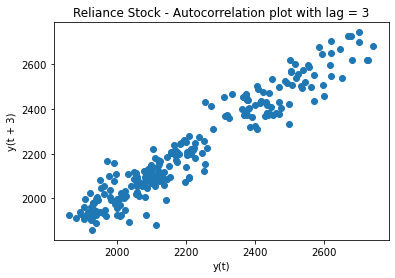

In [6]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('Reliance Stock - Autocorrelation plot with lag = 3')
plt.show()

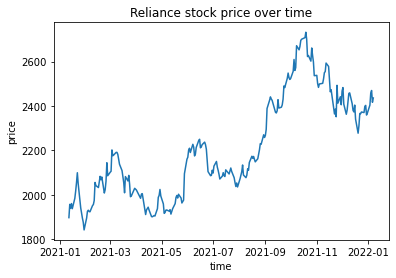

In [8]:
plt.plot(df["Date"], df["Close"])
#plt.xticks(np.arange(0,300, 50), df['Date'][0:300:50])
plt.title("Reliance stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [9]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\Vineet Jain\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 1987.611938380048


In [14]:
#Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_data,model_predictions)/test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

Mean Absolute Percentage Error (MAPE): 3.44 %


In [17]:
model_predictions

[array([2594.53639678]),
 array([2534.2422483]),
 array([2544.76486728]),
 array([2504.5300799]),
 array([2483.22929917]),
 array([2507.23764439]),
 array([2506.66239662]),
 array([2526.02158409]),
 array([2556.65916904]),
 array([2556.51098371]),
 array([2599.29191194]),
 array([2578.49861275]),
 array([2508.90294676]),
 array([2459.57235152]),
 array([2483.54319044]),
 array([2353.74190805]),
 array([2388.17294737]),
 array([2358.69382833]),
 array([2504.09587288]),
 array([2427.97839024]),
 array([2414.23518831]),
 array([2428.50199784]),
 array([2458.75997504]),
 array([2500.17067673]),
 array([2395.89132822]),
 array([2357.56963101]),
 array([2395.68455544]),
 array([2426.6124081]),
 array([2457.51294997]),
 array([2458.74689736]),
 array([2403.94863118]),
 array([2379.0982269]),
 array([2382.36653088]),
 array([2410.6933677]),
 array([2339.35201979]),
 array([2264.61361564]),
 array([2326.17831636]),
 array([2379.96533205]),
 array([2357.58570079]),
 array([2368.13814997]),
 arra

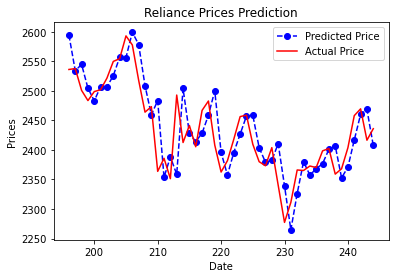

In [11]:
test_set_range = df[int(len(df)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Reliance Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()